In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


<IPython.core.display.Javascript object>


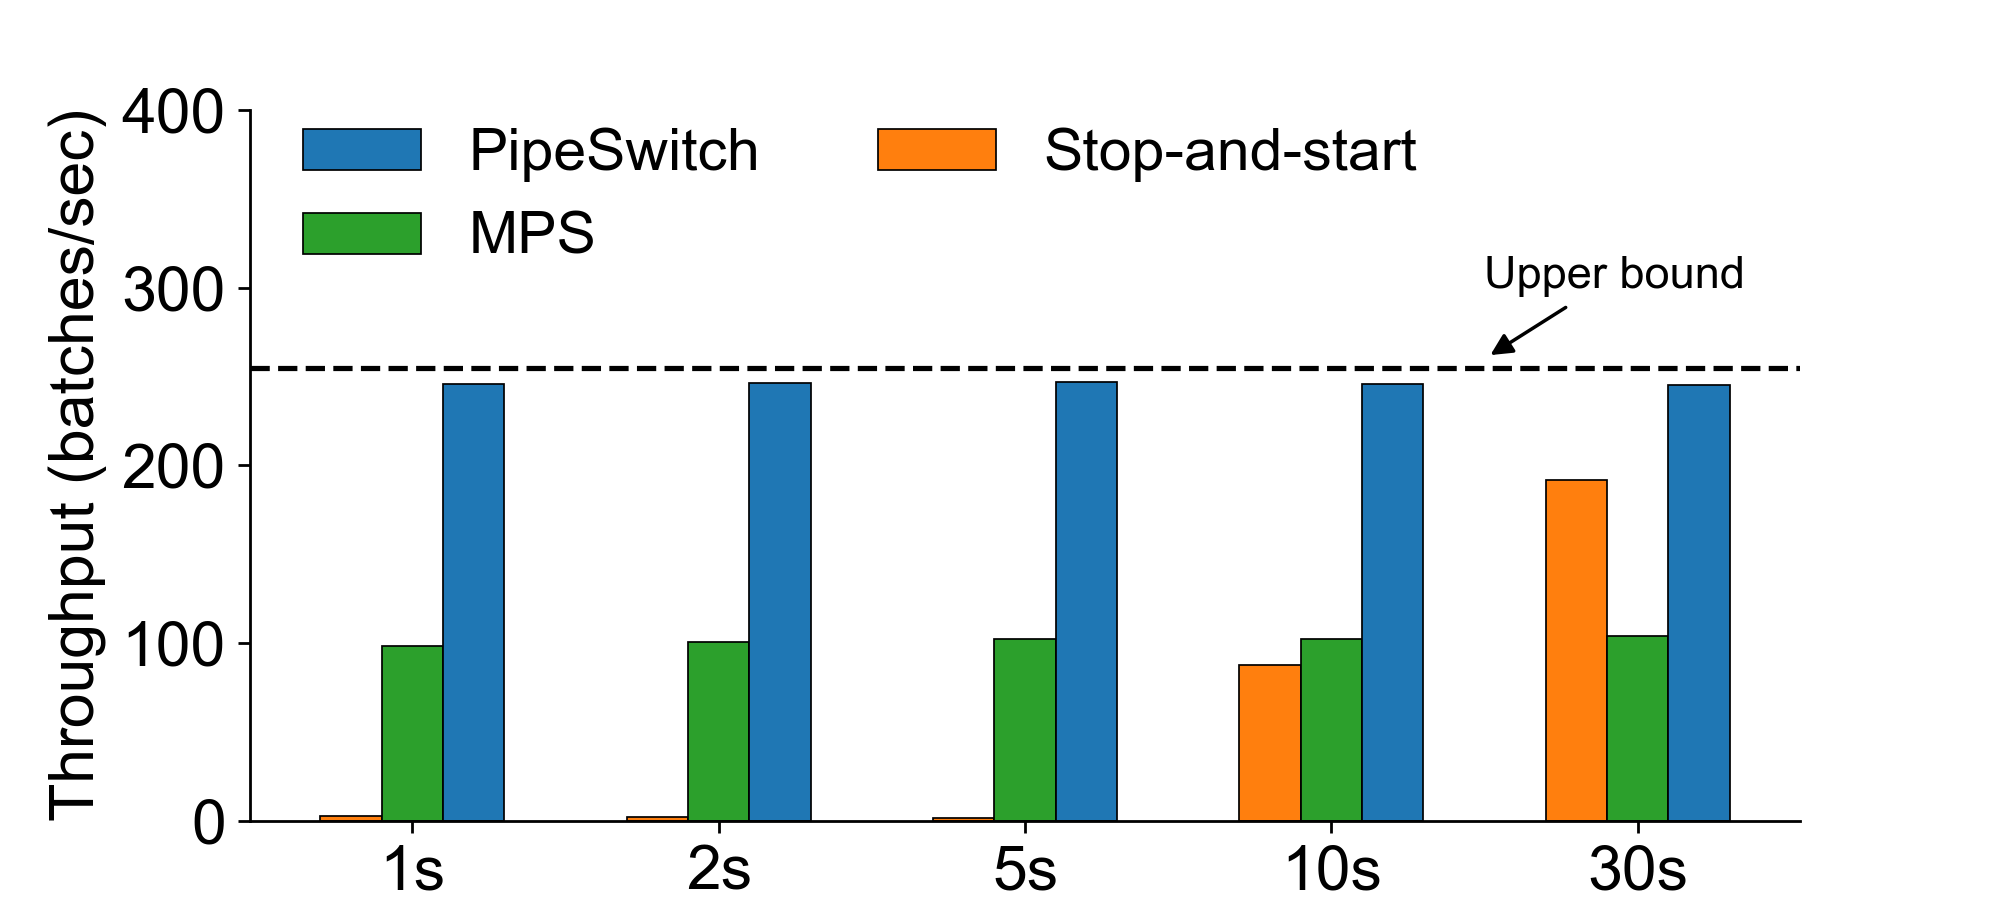

In [42]:
# V100 result
file_name = "Eval_system_throughput.pdf"

intervals = ['1s', '2s', '5s', '10s', '30s']

our_sys = [245.846,246.6133,247.2066,245.7919,245.137]
kill_restart = np.array([0.3, 0.23333333333333334, 0.16666666666666666, 10.96, 23.98]) * 8
mps = [98.5, 100.61999999999999, 102.16666666666666, 102.18799999999999, 103.79733333333334]
# unified_memory = [119.39333333333336, 140.99333333333334, 159.41333333333333, 165.61599999999999, 165.90133333333333]

x = np.arange(len(intervals))
width = 0.8
n = 4

font_size = 18
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)

fig, ax = plt.subplots(figsize=(8, 3.69))

rects2 = ax.bar(x - width/n, kill_restart, width/n, label='Stop-and-start', linewidth=0.5,
                edgecolor='black', color='tab:orange')

rects3 = ax.bar(x , mps, width/n, label='MPS', linewidth=0.5,
                edgecolor='black', color='tab:green')

# rects4 = ax.bar(x + width/n, unified_memory, width/n, label="Unified Memory", linewidth=0.5,
#                 edgecolor='black')
rects1 = ax.bar(x + width/n, our_sys, width/n, label='PipeSwitch', linewidth=0.5,
                edgecolor='black', color='tab:blue')

ax.set_ylabel('Throughput (batches/sec)')
# ax.set_title('End to End Latency: vs Simple Transmission (V100)')
ax.set_xticks(x)
ax.set_xticklabels(intervals)
ax.legend([rects1, rects3, rects2], ['PipeSwitch', 'MPS', 'Stop-and-start'],
    frameon=False, ncol=2, loc='upper left',
          bbox_to_anchor=(0.0, 1.05),
          prop={'size': font_size-1})

ax.set_ylim(0, 400)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axhline(255.008, ls='--', c='k')
# ax.text(3, 260, "Upper bound")
ax.annotate('Upper bound', xy=(3.5, 260),  
            xytext=(3.5, 300),
            arrowprops=dict(facecolor='black', arrowstyle='-|>'),
            fontsize=13
            )

# fig.tight_layout()

# plt.show()
plt.savefig(file_name, format="pdf")
